In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 50
plt.rcParams["figure.figsize"] = (30,15)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)

**Data for Training and Testing**

In [3]:
training_set =pd.read_csv("train.csv")
testing_set=pd.read_csv("test.csv")
testing_labels=pd.read_csv("submit.csv")
testing_set=pd.merge(testing_set, testing_labels)

**Pre-Processing**

In [4]:
def replace_unwanted_characters(word):
    return "".join([char for char in word if char.isalpha()]).lower()
def text_cleaning(text):        
    return [word for word in [replace_unwanted_characters(word) for word in text.split(" ")] if word!='']

In [5]:
training_set=training_set.dropna()
training_set=training_set.reset_index()
training_set["text"]=list(map(text_cleaning,training_set["text"]))
training_set["title"]=list(map(text_cleaning,training_set["title"]))
training_set["author"]=list(map(text_cleaning,training_set["author"]))

**Data Visualization**

In [6]:
def swap_keys_with_values(dictionary):
    new_dictionary={}
    for key,value in dictionary.items():
        new_dictionary[value]=key
    return new_dictionary

def top_k_most_frequent_words(dictionary,k):
    most_frequent_words={}
    if k>len(dictionary):
        print("There are less than {} in the dictionary, pick a number less than or equal to {}".format(k,len(dictionary)))
        return 
    for key in sorted(list(dictionary.keys()))[-k:]:
        most_frequent_words[dictionary[key]]=key
    return most_frequent_words

def unique_words_between_two_dictionaries(dictionary_1,dictionary_2,output_common_words=False):
    common_words=[word for word in dictionary_1.keys() if word in dictionary_2.keys()]
    for word in common_words:
        del dictionary_1[word]
        del dictionary_2[word]
    if output_common_words==True:
        return common_words,dictionary_1,dictionary_2
    return dictionary_1,dictionary_2

def count_frequency_of_words_per_feature(dataframe,feature):
    reliable_feature_word_count,unreliable_feature_word_count={},{}
    for i in range(len(dataframe)):
        if dataframe["label"][i]==0:
            for word in dataframe[feature][i]:
                if word not in reliable_feature_word_count:
                    reliable_feature_word_count[word]=1
                else:
                    reliable_feature_word_count[word]+=1
        else:
            for word in dataframe[feature][i]:
                if word not in unreliable_feature_word_count:
                    unreliable_feature_word_count[word]=1
                else:
                    unreliable_feature_word_count[word]+=1
    return reliable_feature_word_count,unreliable_feature_word_count

def create_visualization_of_top_words(dictionary,feature,common=False,reliable=False):
    df = pd.DataFrame(data=[i for i in list(dictionary.values())[::-1]],columns=["Words"], index = [word for word in list(dictionary.keys())[::-1]])
    df.plot.barh()
    if feature=="author" and realiable==True:
        plt.title('Top {} reliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if feature=="author" and realiable==False:
        plt.title('Top {} unreliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if common==True:
        plt.title('Top {} common words between unreliable and reliable news {}'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==True:
        plt.title('Top {} common words unique to reliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==False:
        plt.title('Top {} common words unique to u reliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    

In [7]:
Reliable_articles_texts,Unreliable_articles_texts=count_frequency_of_words_per_feature(training_set,'text')

Reliable_articles_texts=swap_keys_with_values(Reliable_articles_texts)
Unreliable_articles_texts=swap_keys_with_values(Unreliable_articles_texts)
common_words,unique_reliable_words,unique_unreliable_words=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_texts,50),top_k_most_frequent_words(Unreliable_articles_texts,50),output_common_words=True)
print(common_words,unique_reliable_words,unique_unreliable_words)

['will', 'which', 'been', 'more', 'one', 'would', 'we', 'you', 'or', 'their', 'about', 'were', 'trump', 'its', 'this', 'they', 'are', 'who', 'be', 'has', 'an', 'i', 'but', 'not', 'have', 'from', 'by', 'at', 'his', 'as', 'it', 'with', 'was', 'he', 'is', 'on', 'for', 'that', 'in', 'and', 'a', 'of', 'to', 'the'] {'new': 19561, 'her': 24224, 'she': 26831, 'had': 33849, 'mr': 64509, 'said': 67996} {'clinton': 13439, 'what': 13470, 'people': 13644, 'if': 14258, 'all': 15607, 'us': 17126}


In [8]:
Reliable_articles_authors,Unreliable_articles_authors=count_frequency_of_words_per_feature(training_set,"author")

Reliable_articles_authors=swap_keys_with_values(Reliable_articles_authors)
Unreliable_articles_authors=swap_keys_with_values(Unreliable_articles_authors)

common_authors,unique_reliable_authors,unique_unreliable_authors=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_authors,50),top_k_most_frequent_words(Unreliable_articles_authors,50),output_common_words=True)
print(common_authors,unique_reliable_authors,unique_unreliable_authors)

['patrick', 'news', 'david', 'daniel', 'john', 'michael'] {'andrew': 81, 'tom': 83, 'lucas': 87, 'nash': 89, 'kew': 90, 'jennifer': 91, 'matthew': 93, 'price': 95, 'bob': 96, 'robert': 97, 'matt': 98, 'dan': 99, 'mark': 100, 'jonathan': 101, 'trent': 102, 'julie': 104, 'joel': 106, 'pollak': 107, 'jeff': 112, 'karen': 113, 'katie': 114, 'nussbaum': 116, 'richard': 117, 'james': 119, 'huston': 122, 'eric': 123, 'todd': 124, 'katherine': 126, 'j': 128, 'thomas': 129, 'adam': 130, 'hayward': 140, 'spiering': 141, 'alan': 145, 'neil': 153, 'ben': 165, 'baker': 166, 'hudson': 171, 'd': 183, 'ian': 185, 'key': 242, 'pam': 252, 'charlie': 269, 'and': 1521} {'pcr': 42, 'joe': 44, 'stevew': 45, 'writer': 46, 'conservative': 47, 'daily': 48, 'coward': 50, 'arakelian': 51, 'saker': 55, 'amy': 56, 'paul': 57, 'shorty': 58, 'mike': 60, 'dr': 61, 'king': 62, 'uid': 63, 'postillon': 64, 'stegall': 65, 'sheik': 66, 'smith': 67, 'edjenner': 69, 'henry': 70, 'ditz': 72, 'doc': 73, 'barenakedislam': 74, 

In [9]:
Reliable_articles_titles,Unreliable_articles_titles=count_frequency_of_words_per_feature(training_set,"title")

Reliable_articles_titles=swap_keys_with_values(Reliable_articles_titles)
Unreliable_articles_titles=swap_keys_with_values(Unreliable_articles_titles)

common_titles,unique_reliable_titles,unique_unreliable_titles=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_titles,100),top_k_most_frequent_words(Unreliable_articles_titles,100),output_common_words=True)
print(common_titles,unique_reliable_titles,unique_unreliable_titles)

['black', 'people', 'could', 'american', 'their', 'why', 'man', 'can', 'syria', 'one', 'he', 'against', 'media', 'first', 'has', 'we', 'russia', 'out', 'more', 'police', 'report', 'who', 'what', 'white', 'up', 'no', 'you', 'that', 'news', 'president', 'its', 'hillary', 'his', 'obama', 'clinton', 'are', 'be', 'will', 'how', 'it', 'not', 'over', 'your', 'by', 'after', 'trumps', 'from', 'us', 'as', 'donald', 'with', 'at', 'is', 'on', 'and', 'for', 'a', 'trump', 'of', 'in', 'to', 'new', 'the'] {'russian': 81, 'law': 83, 'million': 84, 'speech': 85, 'women': 86, 'immigration': 88, 'wall': 92, 'case': 95, 'campaign': 98, 'america': 99, 'get': 100, 'years': 101, 'say': 103, 'obamacare': 104, 'calls': 105, 'china': 111, 'democrats': 112, 'court': 114, 'back': 116, 'health': 120, 'dies': 121, 'border': 127, 'gop': 132, 'may': 139, 'was': 149, 'attack': 155, 'bill': 161, 'i': 174, 'have': 178, 'an': 214, 'state': 215, 'house': 220, 'briefing': 233, 'says': 266, 'breitbart': 2395, 'times': 6262, 

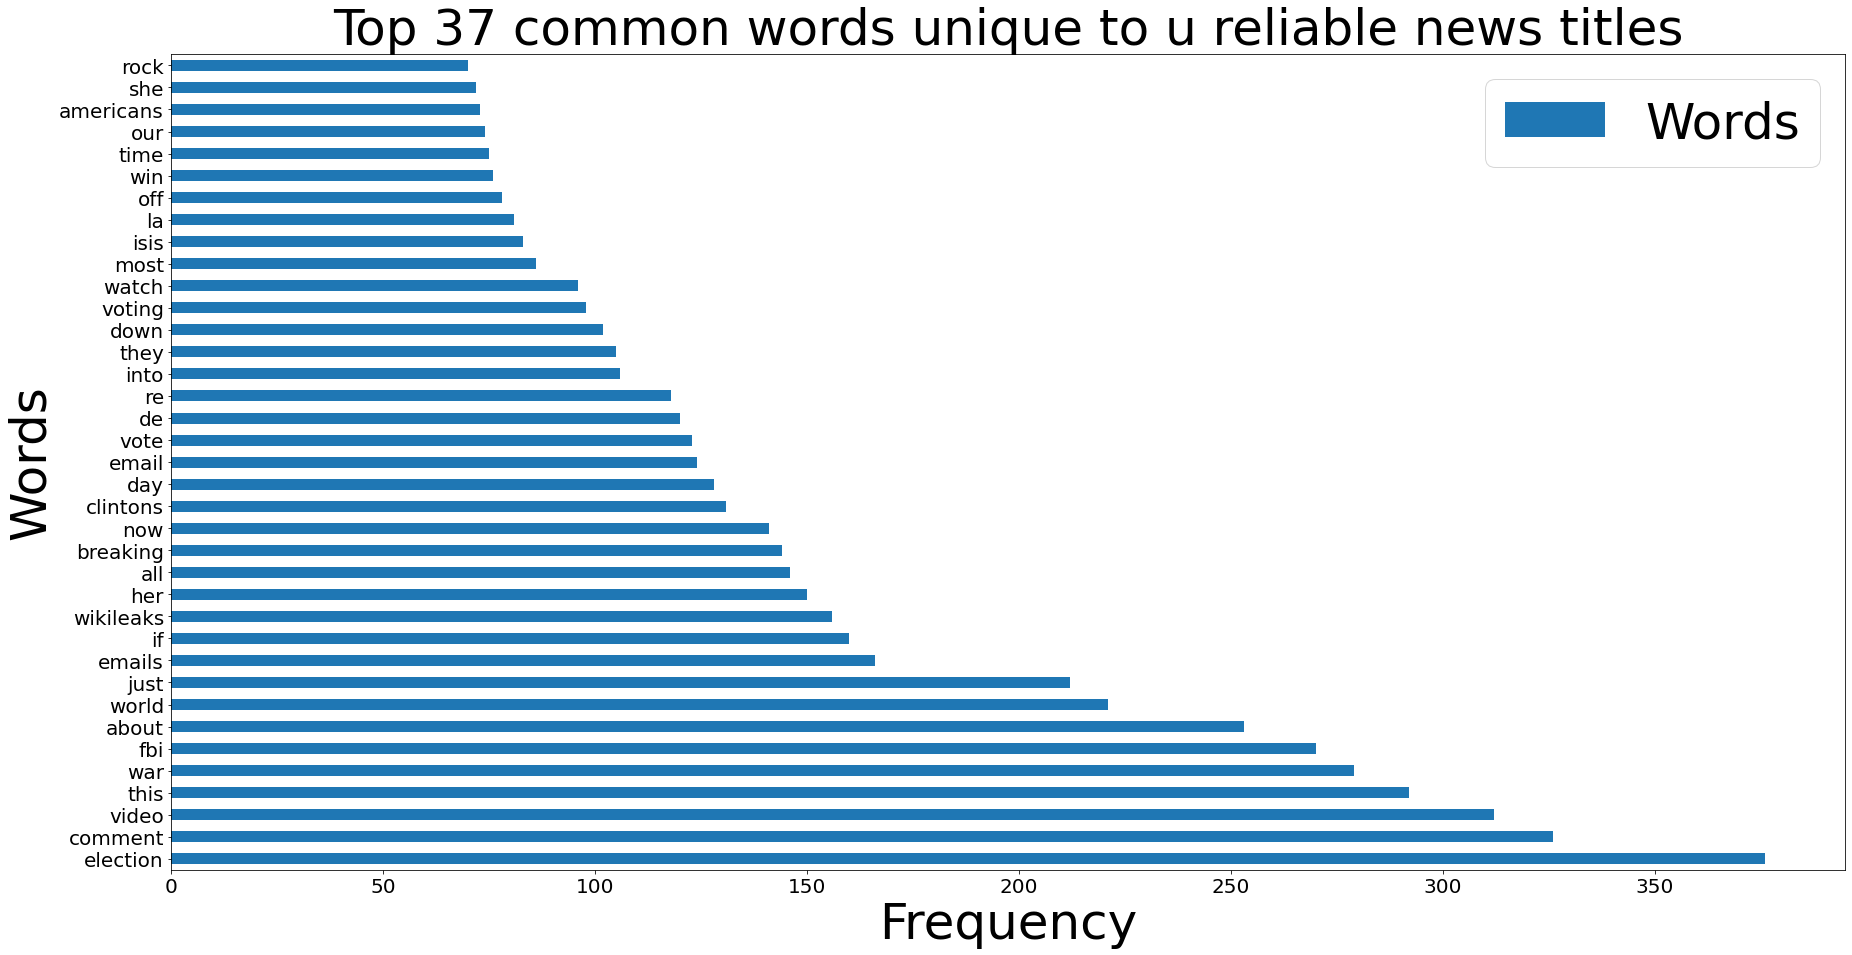

In [14]:
create_visualization_of_top_words(unique_unreliable_titles,"title",common=False,reliable=False)
